In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Exercício 1

1.1

In [4]:
def Simpson(N,f,a,b,*args):
    if N%2==0:
        N+=1

    x=np.linspace(a,b,N)
    w=(1/3)*(x[1]-x[0])*np.ones(len(x))
    w[1::2]*=4
    w[::2]*=2
    w[-1]=w[0]=(1/3)*(x[1]-x[0])
    
    y=np.zeros(len(x))
    y+=f(x,*args)
    
    return np.dot(w,y)

In [20]:
def fun_x(theta,x,y):
    lamb=(np.cos(theta))**4
    
    return (x-np.cos(theta))*lamb/((x-np.cos(theta))**2+(y-np.sin(theta))**2+1)**1.5

def fun_y(theta,x,y):
    lamb=(np.cos(theta))**4
    
    return (y-np.sin(theta))*lamb/((x-np.cos(theta))**2+(y-np.sin(theta))**2+1)**1.5
def Campo_eletrico(x,y):
    campox=Simpson(500,fun_x,0,2*np.pi,x,y)/(4*np.pi)
    campoy=Simpson(500,fun_y,0,2*np.pi,x,y)/(4*np.pi)
    
    return campox, campoy
Campo_eletrico=np.vectorize(Campo_eletrico)

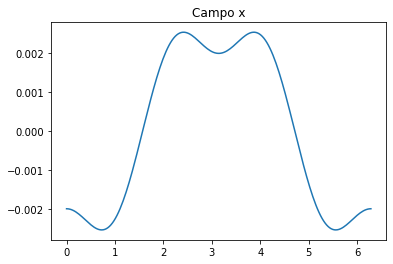

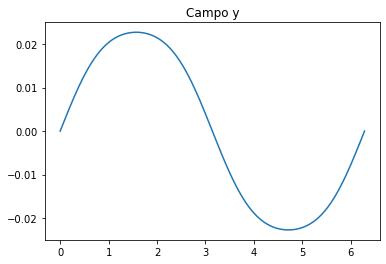

In [24]:
Thetas=np.linspace(0,2*np.pi,200)
XX,YY=0.5*np.cos(Thetas),0.5*np.sin(Thetas)

plt.plot(Thetas,Campo_eletrico(XX,YY)[0])
plt.title("Campo x")
plt.show()
plt.plot(Thetas,Campo_eletrico(XX,YY)[1])
plt.title("Campo y")
plt.show()

1.2

O espaçamento entre $h$ escala com a quarta potência.

1.3 a)

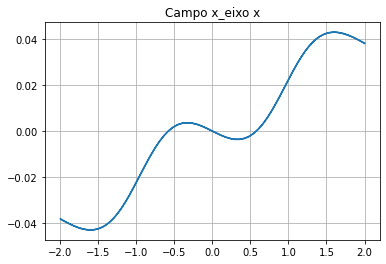

In [22]:
def binary(f,epsilon,x1,x2,*args): # a e b vão ser os limites onde vou analizar os zeros da função
    
    Erro=abs(x1-x2)
    xc=(x1+x2)/2
    if f(x1,*args)*f(x2,*args)<0:
        while Erro > epsilon:    
            xc=(x1+x2)/2
            if f(xc,*args)==0:
                break
            
            else:
                if f(xc,*args)*f(x1,*args)>0:
                    x1=xc
                else:
                    x2=xc
            Erro=abs(x1-x2)
    
    return xc
plt.plot(XX,Campo_eletrico(XX,0)[0])

plt.title("Campo x_eixo x")
plt.grid()
plt.show()

In [23]:
def Campo_eletrico_stable(x):
    campox=Simpson(500,fun_x,0,2*np.pi,x,0)
    
    return  campox

print(binary(Campo_eletrico_stable,10**-6,-1,-0.3),
      binary(Campo_eletrico_stable,10**-6,-0.3,0.2),
      binary(Campo_eletrico_stable,10**-6,0.1,1))

-0.5786278724670408 1.9073486329235223e-07 0.578627109527588


1b) feito oralmente

1.4)

In [9]:
def Runge4(f,r,a,b,N,*args):   
    h=(b-a)/N
    
    tpoints=np.arange(a,b,h)
    ypoints=np.zeros((len(r),len(tpoints)),float)
    
    i=0
    
    for t in tpoints:
        ypoints[:,i]=r
        k1=h*f(r,t,*args)
        k2=h*f(r+0.5*k1,t+0.5*h,*args)
        k3=h*f(r+0.5*k2,t+0.5*h,*args)
        k4=h*f(r+k3,t+h,*args)
        r+=(k1+2*k2+2*k3+k4)/6
        i+=1
    return tpoints, ypoints


In [10]:
vetor_ini=np.array([0.58,0.001,0,0],float)


def func_int(r,t):
    xx=r[0]
    yy=r[1]
    dxdt=r[2]
    dydt=r[3]
    dvxdt=-Campo_eletrico(xx,yy)[0]
    dvydt=-Campo_eletrico(xx,yy)[1]
    
    return np.array([dxdt,dydt,dvxdt,dvydt],float)


    

In [17]:
Tempos0,Pontos0=Runge4(func_int,vetor_ini,0,1000,10000)

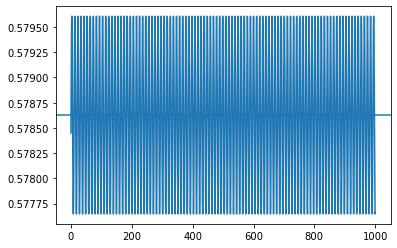

In [18]:
plt.plot(Tempos0,Pontos0[0,:])
plt.axhline(y=0.5786271095275)

In [13]:
vetor_ini1=np.array([0.5,0,0.05,0],float)
vetor_ini2=np.array([0.5,0,0.25,0],float)
Tempos1,Pontos1=Runge4(func_int,vetor_ini1,0,30,1000)
Tempos2,Pontos2=Runge4(func_int,vetor_ini2,0,30,1000)

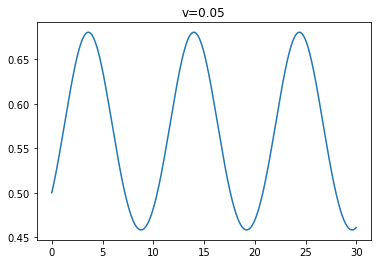

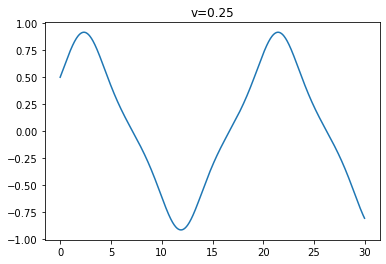

In [14]:
plt.plot(Tempos1,Pontos1[0,:])
plt.title("v=0.05")
plt.show()
plt.plot(Tempos2,Pontos2[0,:])
plt.title("v=0.25")
plt.show()

In [15]:
from numpy.fft import rfft, irfft, fft, ifft

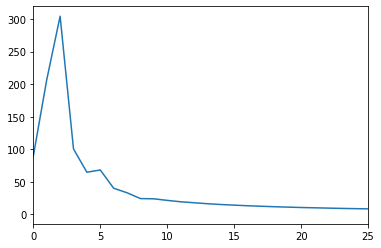

1000


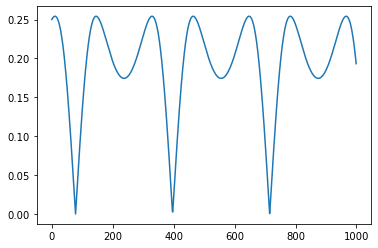

In [16]:
aaa=fft(Pontos2[0,:])
plt.plot(abs(aaa))
plt.xlim(0,25)
plt.show()
plt.plot(abs(Pontos2[2,:]))
print(len(aaa))